# Overview
This data collected on Saturday 22 Aug 2020 on a kayak off of La Jolla Shores.  Estimated wave height approximately 1 foot.

In [1]:
dataFileName = "google_111351745939684758324_0006667E228E_200822154204_Motion.CSV"

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.signal as sps

In [72]:
df_orig = pd.read_csv(dataFileName)
df = df_orig.dropna(axis=0, how='any', subset=['IMU A2'])
df

,UTC,Time,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,Latitude,Longitude
0,2020-08-22T15:42:14.4580+00:00,29149,-30.0,411.0,298.0,-7.0,-22.0,-23.0,10.0,35.0,-29.0,NaN,NaN
1,2020-08-22T15:42:14.7150+00:00,29406,-57.0,424.0,308.0,-66.0,14.0,44.0,9.0,157.0,-121.0,NaN,NaN
2,2020-08-22T15:42:14.9140+00:00,29605,-58.0,425.0,296.0,-58.0,-21.0,160.0,20.0,160.0,-114.0,NaN,NaN
3,2020-08-22T15:42:15.1150+00:00,29806,12.0,373.0,226.0,-26.0,121.0,11.0,9.0,159.0,-127.0,NaN,NaN
4,2020-08-22T15:42:15.3640+00:00,30055,-90.0,428.0,356.0,-91.0,-82.0,-97.0,14.0,172.0,-130.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,2020-08-22T16:10:43.1650+00:00,1737856,145.0,496.0,17.0,74.0,9.0,23.0,-127.0,51.0,269.0,NaN,NaN
8574,2020-08-22T16:10:43.3650+00:00,1738056,138.0,468.0,16.0,203.0,-68.0,113.0,-126.0,64.0,290.0,NaN,NaN
8575,2020-08-22T16:10:43.5640+00:00,1738255,205.0,440.0,-134.0,122.0,-22.0,102.0,-133.0,85.0,301.0,NaN,NaN
8576,2020-08-22T16:10:43.8150+00:00,1738506,245.0,455.0,-131.0,-2.0,49.0,25.0,-135.0,91.0,309.0,NaN,NaN


In [73]:
meanLat = np.mean(df_orig['Latitude'].dropna().to_numpy()) / 1e5
meanLon = np.mean(df_orig['Longitude'].dropna().to_numpy()) / 1e5
print("Located at %f, %f" % (meanLat, meanLon))

Located at 32.855093, -117.260588


Text(0, 0.5, 'Acceleration (g)')

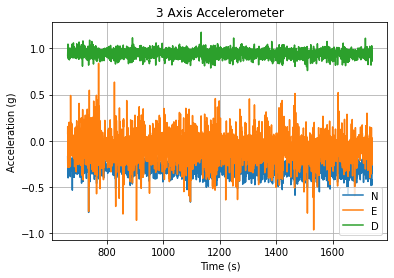

In [90]:
plt.plot(df['Time'][3000:] / 1e3, -df['IMU A1'][3000:] / 512, label='N')
plt.plot(df['Time'][3000:] / 1e3, df['IMU A3'][3000:] / 512, label='E')
plt.plot(df['Time'][3000:] / 1e3, df['IMU A2'][3000:] / 512, label='D')
plt.legend()
plt.grid()
plt.title("3 Axis Accelerometer")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")

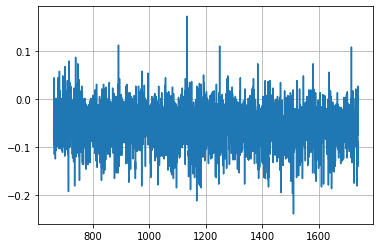

In [91]:
plt.plot(df['Time'][3000:] / 1e3, df['IMU A2'][3000:] / 512 - 1)
plt.grid()

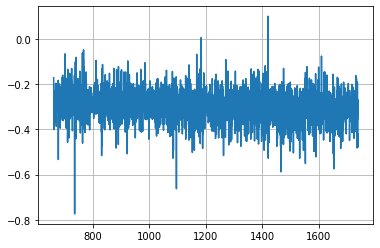

In [92]:
plt.plot(df['Time'][3000:] / 1e3, -df['IMU A1'][3000:] / 512, label='N')
plt.grid()

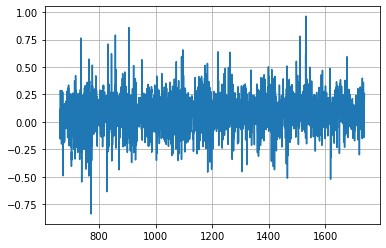

In [93]:
plt.plot(df['Time'][3000:] / 1e3, -df['IMU A3'][3000:] / 512, label='D')
plt.grid()

In [132]:
meanD = np.mean(df['IMU A2'][3000:] / 512 * 9.8)
V_d = spi.cumtrapz(df['IMU A2'][3000:] / 512 * 9.8 - meanD, df['Time'][3000:] / 1e3, initial=-1)

In [133]:
meanD

9.241798738668894

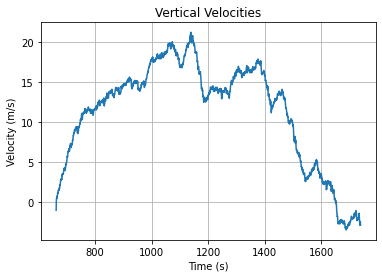

In [134]:
plt.plot(df['Time'][3000:] / 1e3, V_d, label='V_d')
plt.grid()
plt.title("Vertical Velocities")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Time (s)")
plt.savefig("vertical_vels.png")

Text(0.5, 0, 'Time [sec]')

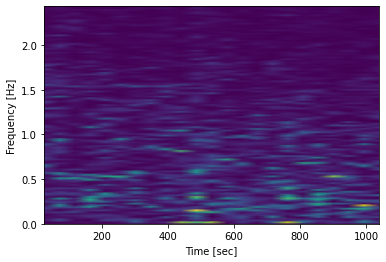

In [102]:
f, t, Sxx = sps.spectrogram(df['IMU A2'][3000:] / 512 * 9.8, fs=1 / np.mean(np.diff(df['Time'][3000:] / 1e3)))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

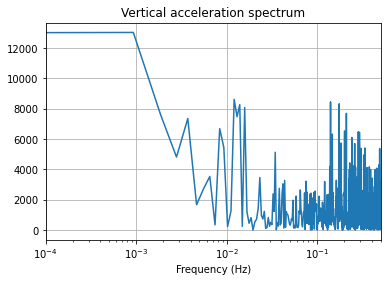

In [151]:

meanD = np.mean(df['IMU A2'][3000:] / 512 * 9.8)
ps = np.abs(np.fft.fft(df['IMU A2'][3000:] / 512 * 9.8 - meanD)) ** 2
timestep = np.mean(np.diff(df['Time'][3000:] / 1e3))
freqs = np.fft.fftfreq(len(df['IMU A2'][3000:]), timestep)
idx = np.argsort(freqs)
plt.semilogx(freqs[idx], ps[idx])
plt.xlim(0.0001, 0.5)
plt.title("Vertical acceleration spectrum")
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.savefig("vertical_acceleration_spectrum.png")